# Modelagem e Previsão

Neste notebook, vamos utilizar diversos modelos para prever o preço de casas a partir dos dados processados em `preprocessing.ipynb`. Os modelos serão avaliados de acordo com a raiz do erro quadrático médio (RMSE) e o melhor modelo será escolhido para ser acessado via API para previsões.

## 0. Importação de dados e bibliotecas

In [6]:
import numpy as np
import os
import pathlib
import pandas as pd

In [7]:
DATA_PATH = os.path.join(pathlib.Path.cwd().parent, 'fetch_data', 'data_final.parquet')

data = pd.read_parquet(DATA_PATH)

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import xgboost as xgb
from sklearn.svm import LinearSVR
from catboost import CatBoostRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso, ElasticNet, BayesianRidge

In [9]:
# Separação Treinamento - Teste

X = data.drop(['SalePrice'], axis=1)
y = data['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 1. Modelos

### 1.1. Random Forest com Grid Search para otimização de hiperparâmetros

In [10]:
# Modelo de Random Forest com Grid Search

params = {'n_estimators': [100, 200, 300],
          'max_depth': [3, 5, 7],
}

grid = GridSearchCV(RandomForestRegressor(verbose=1), params, verbose=1, cv=5, n_jobs=-1)
grid.fit(X_train, y_train)
best_params = grid.best_params_
best_model = grid.best_estimator_

ypred = best_model.predict(X_test)
RMSE_RF = np.sqrt(mean_squared_error(y_test, ypred))
error_percent_rf = 100 * (10**RMSE_RF - 1)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.8s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.8s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.8s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.8s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.9s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.9s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.8s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.8s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.8s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.8s
[Parallel(n_jobs=1)]: Do

In [11]:
print('RMSE: ', RMSE_RF)
print('Error percent: ', error_percent_rf)

RMSE:  0.05496162301401201
Error percent:  13.491052342477605


### 1.2. XGBoost

In [12]:
# Modelo de Extreme Gradient Boosting

xgb_model = xgb.XGBRegressor(objective="reg:squarederror", random_state=42)
xgb_model.fit(X_train, y_train)
ypred = xgb_model.predict(X_test)
RMSE_XGB = np.sqrt(mean_squared_error(y_test, ypred))
error_percent_xgb = 100 * (10**RMSE_XGB - 1)

/home/thomaschiari/dev/insper/4sem/ml/Machine-Learning-Ames/env/lib/python3.10/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/thomaschiari/dev/insper/4sem/ml/Machine-Learning-Ames/env/lib/python3.10/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/home/thomaschiari/dev/insper/4sem/ml/Machine-Learning-Ames/env/lib/python3.10/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/home/thomaschiari/dev/insper/4sem/ml/Machine-Learning-Ames/env/lib/python3.10/site-packages/xgboost/data.py:359: FutureWarn

In [13]:
print('RMSE: ', RMSE_XGB)
print('Error percent: ', error_percent_xgb)

RMSE:  0.050579030475322896
Error percent:  12.35154021078908


### 1.3. Support Vector Machine Regression

O modelo SVR não convergiu com os dados inseridos, porém ainda assim foi possível obter seu RMSE.

In [14]:
# Support Vector Regressor Linear

svr = LinearSVR(random_state=42, max_iter=10000)
svr.fit(X_train, y_train)
ypred = svr.predict(X_test)
RMSE_SVR = np.sqrt(mean_squared_error(y_test, ypred))
error_percent_svr = 100 * (10**RMSE_SVR - 1)

/home/thomaschiari/dev/insper/4sem/ml/Machine-Learning-Ames/env/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


/home/thomaschiari/dev/insper/4sem/ml/Machine-Learning-Ames/env/lib/python3.10/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [15]:
print('RMSE: ', RMSE_SVR)
print('Error percent: ', error_percent_svr)

RMSE:  0.05646330385467588
Error percent:  13.884155025773648


### 1.4. Regressão Linear

In [16]:
# Linear Regression

lr = LinearRegression()
lr.fit(X_train, y_train)
ypred = lr.predict(X_test)
RMSE_LR = np.sqrt(mean_squared_error(y_test, ypred))
error_percent_lr = 100 * (10**RMSE_LR - 1)

/tmp/ipykernel_72138/666227836.py:7: RuntimeWarning: overflow encountered in scalar power
  error_percent_lr = 100 * (10**RMSE_LR - 1)


In [17]:
print('RMSE: ', RMSE_LR)
print('Error percent: ', error_percent_lr)

RMSE:  1831323.6879101996
Error percent:  inf


### 1.5. Regressões Lineares com regularização: Lasso, Ridge, ElasticNet e BayesianRidge

In [18]:
# Ridge, Lasso, Elastic Net e Bayesian Ridge

ridge = Ridge()
ridge.fit(X_train, y_train)
ypred = ridge.predict(X_test)
RMSE_RIDGE = np.sqrt(mean_squared_error(y_test, ypred))
error_percent_ridge = 100 * (10**RMSE_RIDGE - 1)

lasso = Lasso()
lasso.fit(X_train, y_train)
ypred = lasso.predict(X_test)
RMSE_LASSO = np.sqrt(mean_squared_error(y_test, ypred))
error_percent_lasso = 100 * (10**RMSE_LASSO - 1)

elastic = ElasticNet()
elastic.fit(X_train, y_train)
ypred = elastic.predict(X_test)
RMSE_ELASTIC = np.sqrt(mean_squared_error(y_test, ypred))
error_percent_elastic = 100 * (10**RMSE_ELASTIC - 1)

bayesian = BayesianRidge()
bayesian.fit(X_train, y_train)
ypred = bayesian.predict(X_test)
RMSE_BAYESIAN = np.sqrt(mean_squared_error(y_test, ypred))
error_percent_bayesian = 100 * (10**RMSE_BAYESIAN - 1)

In [19]:
print('RMSE Ridge: ', RMSE_RIDGE)
print('Error percent Ridge: ', error_percent_ridge)

print('RMSE Lasso: ', RMSE_LASSO)
print('Error percent Lasso: ', error_percent_lasso)

print('RMSE Elastic: ', RMSE_ELASTIC)
print('Error percent Elastic: ', error_percent_elastic)

print('RMSE Bayesian: ', RMSE_BAYESIAN)
print('Error percent Bayesian: ', error_percent_bayesian)

RMSE Ridge:  0.054451616433615284
Error percent Ridge:  13.357854216981835
RMSE Lasso:  0.1665520017942192
Error percent Lasso:  46.74117821569086
RMSE Elastic:  0.1665520017942192
Error percent Elastic:  46.74117821569086
RMSE Bayesian:  0.054913599698849666
Error percent Bayesian:  13.47850344886612


### 1.6. CatBoost Regressor

Para o CatBoost Regressor, a otimização de hiperparâmetros foi feita via Google Colab utilizando um acelerador de GPU para ser mais eficiente. Utilizamos os parâmetros aqui apresentados, testando inclusive o `learning_rate` padrão apresentado na biblioteca. A imagem a seguir mostra o grid de hiperparâmetros testados.

![catboost](./grid_cat.png)

In [22]:
# CatBoost Regressor

cat = CatBoostRegressor(iterations=20000)
cat.fit(X_train, y_train)
ypred = cat.predict(X_test)
RMSE_CAT = np.sqrt(mean_squared_error(y_test, ypred))
error_percent_cat = 100 * (10**RMSE_CAT - 1)

Learning rate set to 0.004094
0:	learn: 0.1734135	total: 2.74ms	remaining: 54.8s
1:	learn: 0.1729256	total: 5.54ms	remaining: 55.4s
2:	learn: 0.1724448	total: 8.34ms	remaining: 55.6s
3:	learn: 0.1719813	total: 11ms	remaining: 55.1s
4:	learn: 0.1715110	total: 40.5ms	remaining: 2m 41s
5:	learn: 0.1710601	total: 49.6ms	remaining: 2m 45s
6:	learn: 0.1706077	total: 71.2ms	remaining: 3m 23s
7:	learn: 0.1701350	total: 79.8ms	remaining: 3m 19s
8:	learn: 0.1696569	total: 90.9ms	remaining: 3m 21s
9:	learn: 0.1691803	total: 121ms	remaining: 4m 1s
10:	learn: 0.1687345	total: 137ms	remaining: 4m 8s
11:	learn: 0.1682888	total: 142ms	remaining: 3m 56s
12:	learn: 0.1678235	total: 146ms	remaining: 3m 44s
13:	learn: 0.1673585	total: 149ms	remaining: 3m 33s
14:	learn: 0.1668968	total: 153ms	remaining: 3m 24s
15:	learn: 0.1664236	total: 157ms	remaining: 3m 15s
16:	learn: 0.1659957	total: 161ms	remaining: 3m 9s
17:	learn: 0.1655322	total: 167ms	remaining: 3m 5s
18:	learn: 0.1650808	total: 172ms	remaining: 

23:	learn: 0.1628568	total: 197ms	remaining: 2m 43s
24:	learn: 0.1624538	total: 201ms	remaining: 2m 40s
25:	learn: 0.1620389	total: 204ms	remaining: 2m 36s
26:	learn: 0.1615792	total: 207ms	remaining: 2m 33s
27:	learn: 0.1611516	total: 210ms	remaining: 2m 29s
28:	learn: 0.1607231	total: 215ms	remaining: 2m 27s
29:	learn: 0.1603188	total: 218ms	remaining: 2m 25s
30:	learn: 0.1598959	total: 222ms	remaining: 2m 23s
31:	learn: 0.1594727	total: 225ms	remaining: 2m 20s
32:	learn: 0.1590444	total: 228ms	remaining: 2m 18s
33:	learn: 0.1586334	total: 231ms	remaining: 2m 15s
34:	learn: 0.1582141	total: 234ms	remaining: 2m 13s
35:	learn: 0.1578057	total: 238ms	remaining: 2m 11s
36:	learn: 0.1574031	total: 241ms	remaining: 2m 9s
37:	learn: 0.1569643	total: 244ms	remaining: 2m 7s
38:	learn: 0.1565565	total: 247ms	remaining: 2m 6s
39:	learn: 0.1561227	total: 249ms	remaining: 2m 4s
40:	learn: 0.1557120	total: 253ms	remaining: 2m 3s
41:	learn: 0.1552963	total: 258ms	remaining: 2m 2s
42:	learn: 0.15487

In [23]:
print('RMSE: ', RMSE_CAT)
print('Error percent: ', error_percent_cat)

RMSE:  0.04401411708492691
Error percent:  10.665975624188317


## 2. Importância de Features

A seguir, vamos analisar a importância das features em alguns modelos realizados que possuem essa funcionalidade.

### 2.1. CatBoost

O modelo CatBoost Regressor foi o que apresentou melhor desempenho. As duas features mais relevantes foram `Ttl.Home.Qual`, uma variável criada por nós com base na qualidade e condição do imóvel, `Gr.Liv.Area`, com a área total do imóvel, e `Age`, uma variável também criada por nós que representa a idade do imóvel na data de compra. Aqui, podemos ver que nossa engenharia de features foi bem sucedida, visto que duas das 3 variáveis mais importantes foram obtidas nessa sessão.

In [25]:
# Feature Importances do CatBoost
importances = cat.feature_importances_
indices = np.argsort(importances)[::-1]
names = [X.columns[i] for i in indices]

# criar dataframe com importância das features
feature_importances = pd.DataFrame(importances, index=X.columns, columns=['importance']).sort_values('importance', ascending=False)
feature_importances.head(20)

,importance
Ttl.Home.Qual,13.680280
Gr.Liv.Area,12.863127
Age,12.035392
Total.Bsmt.SF,5.900754
Ttl.Bath,5.451715
X1st.Flr.SF,4.938250
Exter.Qual,4.185093
Garage.Area,3.862696
Fireplaces,3.477687
Sq.Ft.PerRoom,3.089174


/home/thomaschiari/dev/insper/4sem/ml/Machine-Learning-Ames/env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/thomaschiari/dev/insper/4sem/ml/Machine-Learning-Ames/env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/thomaschiari/dev/insper/4sem/ml/Machine-Learning-Ames/env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


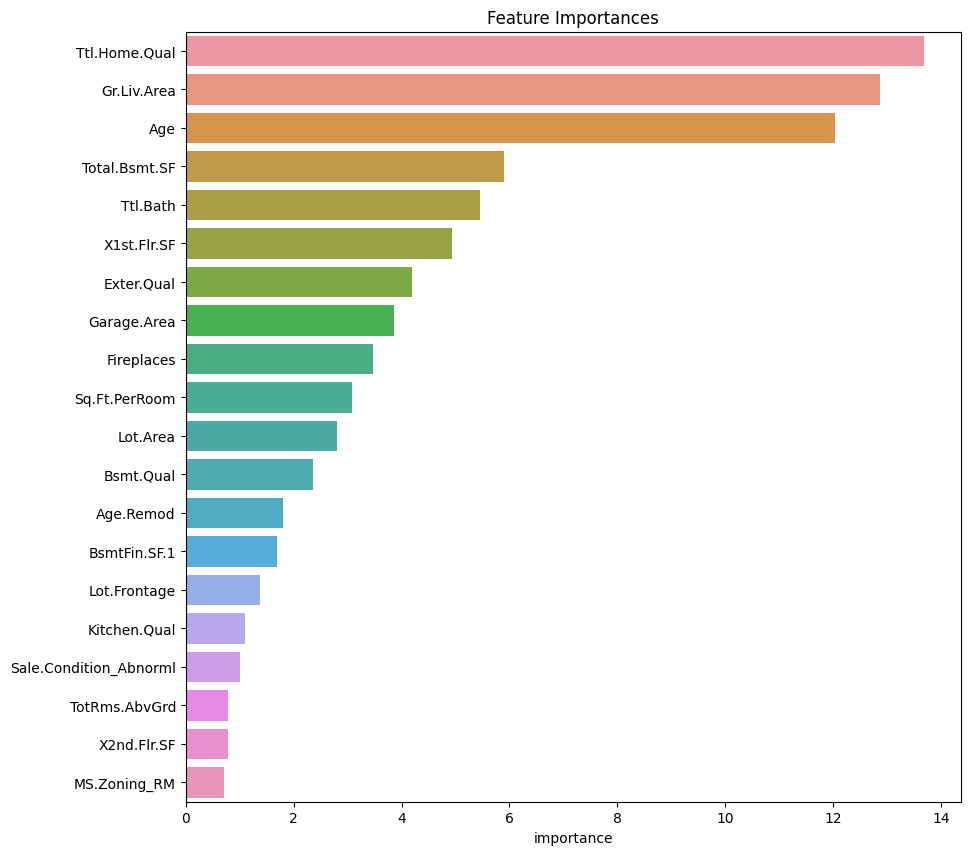

In [26]:
# plotar as importâncias das features
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 10))
sns.barplot(x=feature_importances['importance'][:20], y=feature_importances.index[:20])
plt.title('Feature Importances')
plt.show()

### 2.2. Ridge

No modelo Ridge, também utilizado na API, obtemos um resultado diferente, com as features mais importantes sendo `Garage.Type_None` e `Neighborhood_GrnHill`. Ambas as features são categóricas e foram criadas por nós no pré-processamento. Não esperávamos que tais features fossem tão relevantes para o modelo quanto as demonstradas anteriormente, porém isso pode ter ocorrido por conta da regularização L2 do Ridge, que penaliza algumas features para evitar multicolinearidade.

In [27]:
# Feature Importances do Ridge
importances = ridge.coef_
indices = np.argsort(importances)[::-1]
names = [X.columns[i] for i in indices]

# criar dataframe com importância das features
feature_importances = pd.DataFrame(importances, index=X.columns, columns=['importance']).sort_values('importance', ascending=False)
feature_importances.head(20)

,importance
Garage.Type_None,0.093824
Neighborhood_GrnHill,0.090272
Neighborhood_StoneBr,0.049938
Foundation_Stone,0.044926
Neighborhood_Greens,0.043947
House.Style_2.5Fin,0.041070
Sale.Condition_AdjLand,0.040715
Neighborhood_NoRidge,0.038359
Ttl.Home.Qual,0.035993
Exterior_BrkFace,0.034521


### 2.3. Random Forest

Aqui, obtemos um resultado semelhante com o que foi obtido com o CatBoost, e que também era esperado de acordo com nossa análise exploratória. As features mais importantes são `Gr.Liv.Area`, `Age` e `Ttl.Home.Qual`, com `Age` se destacando.

In [28]:
importances = best_model.feature_importances_
indices = np.argsort(importances)[::-1]
names = [X.columns[i] for i in indices]

# criar dataframe com importância das features
feature_importances = pd.DataFrame(importances, index=X.columns, columns=['importance']).sort_values('importance', ascending=False)
feature_importances.head(20)

,importance
Age,0.398633
Ttl.Home.Qual,0.184704
Gr.Liv.Area,0.144381
X1st.Flr.SF,0.041003
Total.Bsmt.SF,0.035905
Fireplaces,0.033104
Exter.Qual,0.028205
Garage.Area,0.026759
Ttl.Bath,0.016455
Lot.Area,0.013405


## 3. Conclusão

Para a API, vamos utilizar o melhor modelo obtido, que foi o CatBoost, com os melhores parâmetros obtidos, treinado, porém, com todos os dados disponíveis. Vamos também utilizar o modelo Ridge, que é um modelo linear eficiente. A regressão linear não convergiu com os dados inseridos, e por isso não será utilizada. 

Como o modelo já está treinado para servir a API, não estamos muito preocupados com eficiência. Portanto, o CatBoost, mesmo sendo o mais demorado, foi o que escolhemos para servir na API, visto que utilizaremos apenas o método `predict` de um modelo salvo como arquivo executável. Porém, se fosse necessário prezar pela eficiência, provavelmente não escolheríamos o mesmo modelo. O CatBoost demorou, em média, 3 minutos para ser executado (sem contar a seleção de hiperparâmetros, que demorou mais de 1 hora), para um ganho de performance de, aproximadamente, 3% de erro para os modelos lineares com regulareização, que demoraram menos de 1 segundo para serem executados. Portanto, se fosse necessário prezar pela eficiência, escolheríamos um dos modelos lineares como regularização. Também poderíamos utilizar o modelo XGBoost, que com os parâmetros padrão, conseguiu um resultado de erro de aproximadamente 12%, demorando também menos de 1 segundo para rodar. Caso fosse realizada uma otimização de hiperparâmetros, acreditamos que poderíamos obter um resultado ainda melhor.

O modelo de Regressão Linear provavelmente não convergiu por conta da alta dimensionalidade dos dados, que pode ter causado multicolinearidade. Por isso a porcentagem de erro encontrada é infinita. O modelo SVR também não convergiu, também provavelmente por conta da alta dimensionalidade dos dados, porém ainda assim recebemos um resultado aceitável para o erro. 

Em resumo, caso o modelo precisasse ir para um ambiente de produção, em uma empresa, provavelmente não manteríamos nossa escolha, pois perderíamos eficiência em prol de uma performance que não é tão melhor. Como estamos utilizando um modelo que não precisa ser treinado novamente e em um ambiente de testes, mantemos nossa decisão.